# Análise de Dados: Histórico de Preços das Ações da Netflix
**Nome:** Rafael Novaes Branco  
**Matrícula:** 4052024001618  
**Dataset:** [NETFLIX STOCK DATA](https://www.kaggle.com/datasets/adilshamim8/netflix-stock-price-history)



## 1. Definição do Problema
**Descrição:** Este trabalho tem como objetivo analisar o histórico de preços das ações da Netflix ao longo dos anos, com foco em identificar padrões, tendências e comportamentos de mercado que possam fornecer insights úteis sobre a valorização da empresa no mercado financeiro.

**Tipo de problema:** Não supervisionado (análise exploratória sem rótulo alvo).

**Premissas/Hipóteses:**
- A cotação das ações da Netflix reflete os movimentos do mercado e os resultados operacionais da empresa.
- Eventos externos (como pandemia ou lançamentos de produtos) impactam diretamente os preços e volumes negociados.

**Restrições na seleção dos dados:**
- Apenas dados históricos de ações da empresa Netflix extraídos de fontes públicas e confiáveis (Yahoo Finance).

**Definição dos atributos:**
- `Date`: Data da cotação.
- `Open`: Preço de abertura da ação.
- `High`: Maior preço registrado no dia.
- `Low`: Menor preço registrado no dia.
- `Close`: Preço de fechamento da ação.
- `Volume`: Quantidade de ações negociadas no dia.

### Comentário:
As bibliotecas pandas, numpy, matplotlib, seaborn e datetime são essenciais para análise de dados, visualizações e manipulação de datas. São usadas em praticamente todas as etapas do processo de ciência de dados.

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from datetime import datetime

### Comentário:
Aqui carregamos o dataset CSV contendo o histórico de preços da Netflix, convertemos a coluna de data e ordenamos cronologicamente para garantir consistência nas análises temporais.

In [2]:
# Leitura dos dados
df = pd.read_csv('Netflix_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


## 2. Análise Exploratória dos Dados

### Comentário:
Antes de realizar qualquer análise, é necessário entender a estrutura do dataset: tipos de dados, presença de valores ausentes e a natureza dos atributos.

In [3]:
# Verificar estrutura e tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5810 non-null   datetime64[ns]
 1   Close   5810 non-null   float64       
 2   High    5810 non-null   float64       
 3   Low     5810 non-null   float64       
 4   Open    5810 non-null   float64       
 5   Volume  5810 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 272.5 KB


### Comentário:
Resumo estatístico é essencial para observar a variação dos dados, médias, valores extremos e entender a escala dos atributos numéricos.

In [4]:
# Verificar estatísticas descritivas iniciais
df.describe()

,Date,Close,High,Low,Open,Volume
count,5810,5810.000000,5810.000000,5810.000000,5810.000000,5.810000e+03
mean,2013-12-05 14:53:14.767642112,174.277189,176.778673,171.606167,174.184463,1.513608e+07
min,2002-05-23 00:00:00,0.372857,0.410714,0.346429,0.377857,2.856000e+05
25%,2008-02-29 18:00:00,4.307500,4.406428,4.226071,4.310714,5.385225e+06
50%,2013-12-04 12:00:00,47.330715,48.094999,46.490715,47.347857,9.366850e+06
75%,2019-09-12 18:00:00,319.687500,324.845009,313.472504,319.279991,1.803375e+07
max,2025-06-25 00:00:00,1279.109985,1298.000000,1273.810059,1286.839966,3.234140e+08
std,NaN,238.038218,241.092964,234.690133,237.807511,1.836569e+07


### Comentário:
Dados ausentes precisam ser identificados antes de qualquer modelagem ou visualização. Aqui, verificamos se é necessário tratar dados nulos.

In [5]:
# Verificar valores ausentes
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [6]:
# Quantidade de linhas e colunas
print(f'Total de instâncias: {df.shape[0]}')
print(f'Total de atributos: {df.shape[1]}')

Total de instâncias: 5810
Total de atributos: 6


### Distribuição dos atributos numéricos

### Comentário:
Os histogramas revelam como os dados estão distribuídos. Ajudam a identificar assimetrias, presença de outliers e se os dados seguem distribuições comuns como normal, exponencial ou outras.

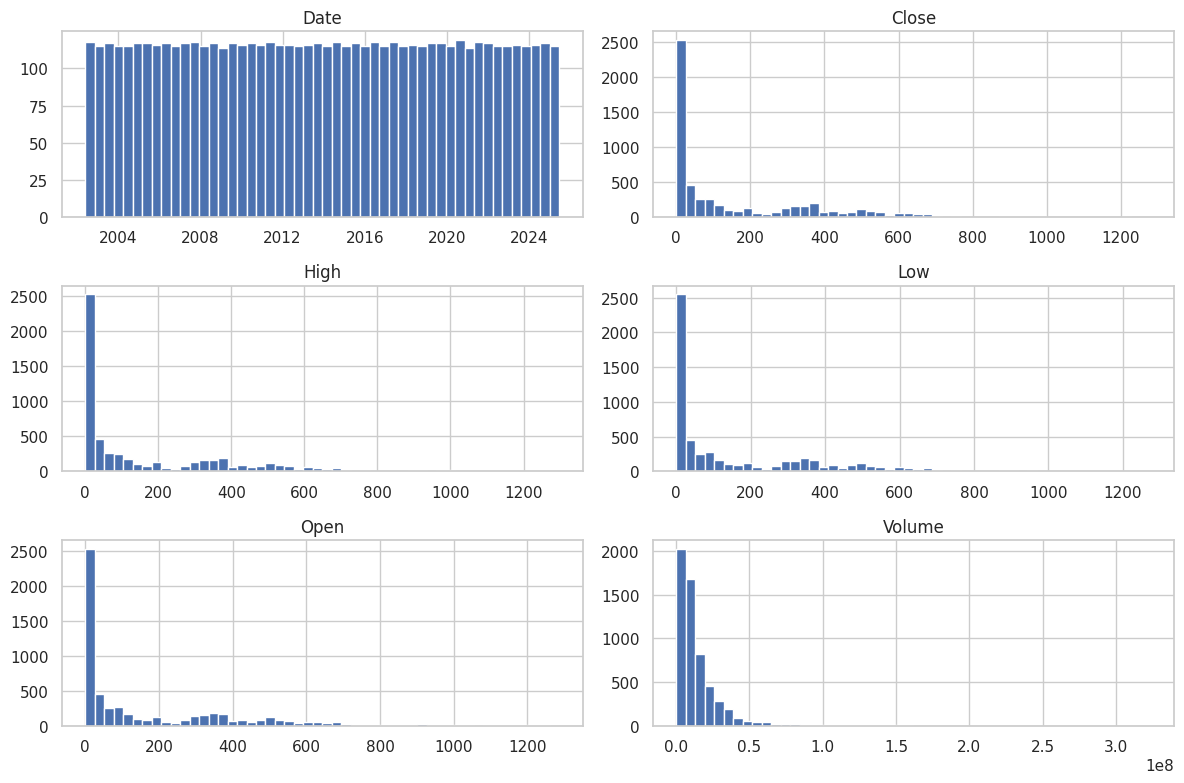

In [7]:
# Histograma dos atributos numéricos
df.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

### Evolução do Preço de Fechamento

### Comentário:
Este gráfico de linha mostra a trajetória da ação da Netflix ao longo dos anos. Ele é útil para detectar tendências de longo prazo, ciclos de mercado e mudanças estruturais no comportamento da ação.

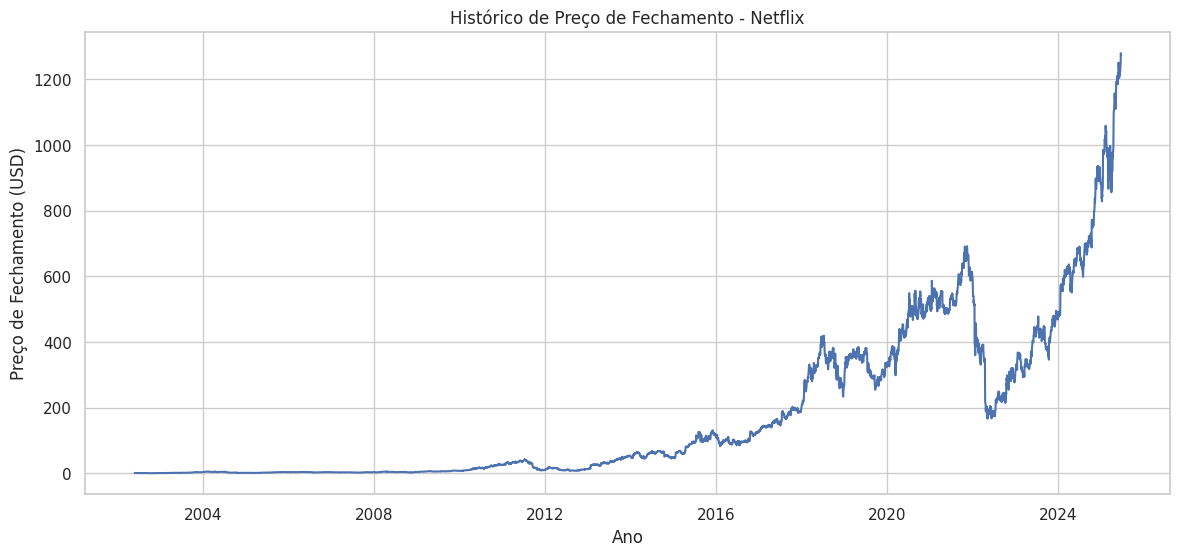

In [8]:
# Evolução histórica do preço de fechamento
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'])
plt.title('Histórico de Preço de Fechamento - Netflix')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

### Volume Negociado ao Longo do Tempo

### Comentário:
O volume negociado reflete o interesse do mercado. Picos no volume podem indicar eventos importantes como divulgações financeiras, lançamentos de produtos ou crises.

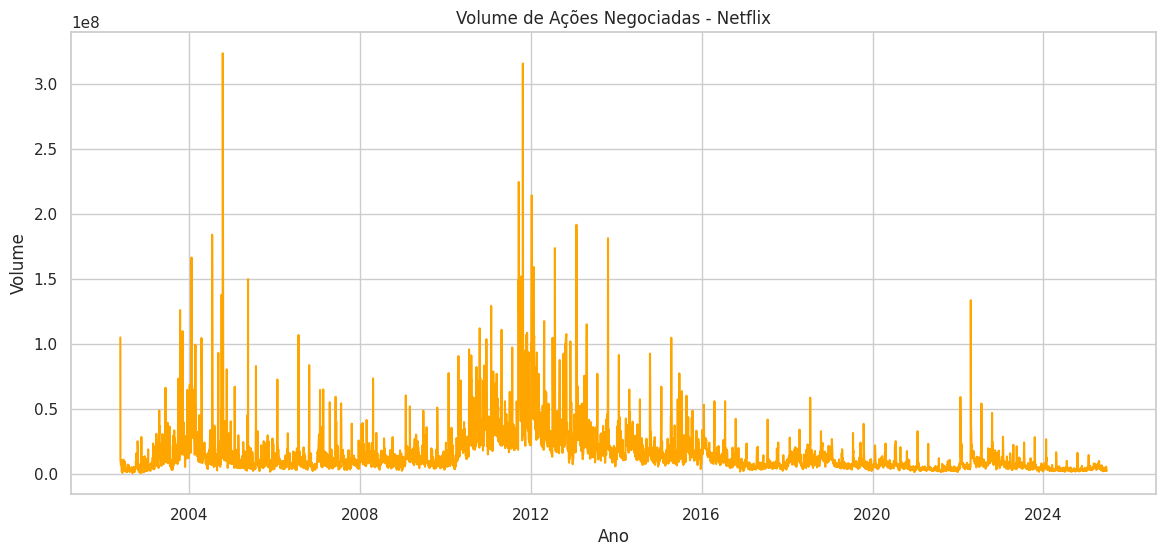

In [9]:
# Gráfico de volume
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('Volume de Ações Negociadas - Netflix')
plt.xlabel('Ano')
plt.ylabel('Volume')
plt.show()

## 3. Pré-processamento dos Dados

In [10]:
# Nenhum valor ausente foi encontrado. Aplicando normalização dos preços.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df_scaled[['Open', 'High', 'Low', 'Close']])
df_scaled.head()

,Date,Close,High,Low,Open,Volume
0,2002-05-23,0.000644,0.000641,0.000628,0.000605,104790000
1,2002-05-24,0.000655,0.000628,0.000668,0.000650,11104800
2,2002-05-28,0.000613,0.000633,0.000637,0.000650,6609400
3,2002-05-29,0.000571,0.000581,0.000581,0.000611,6757800
4,2002-05-30,0.000546,0.000537,0.000569,0.000567,10154200


## 4. Análises Complementares

### Comentário:
A média móvel suaviza a variação diária do preço, revelando a tendência geral. A de 30 dias é útil para identificar movimentos de curto/médio prazo no mercado.

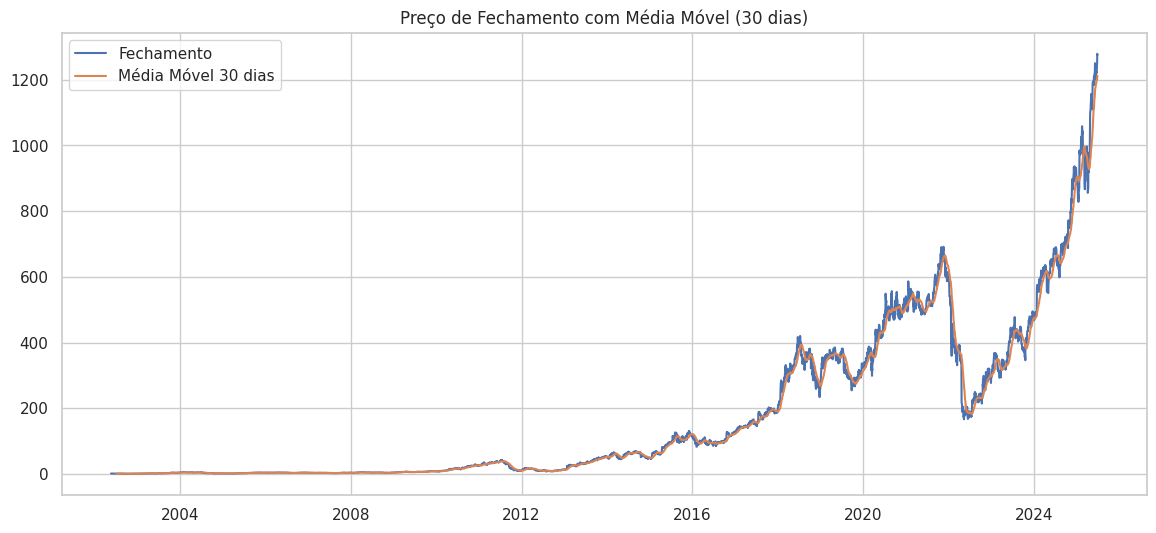

In [11]:
# Média móvel de 30 dias
df['MA30'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Fechamento')
plt.plot(df['Date'], df['MA30'], label='Média Móvel 30 dias')
plt.legend()
plt.title('Preço de Fechamento com Média Móvel (30 dias)')
plt.show()

### Comentário:
Este gráfico mostra a volatilidade da ação, revelando dias com fortes quedas ou altas. Isso ajuda a avaliar o risco envolvido no ativo.

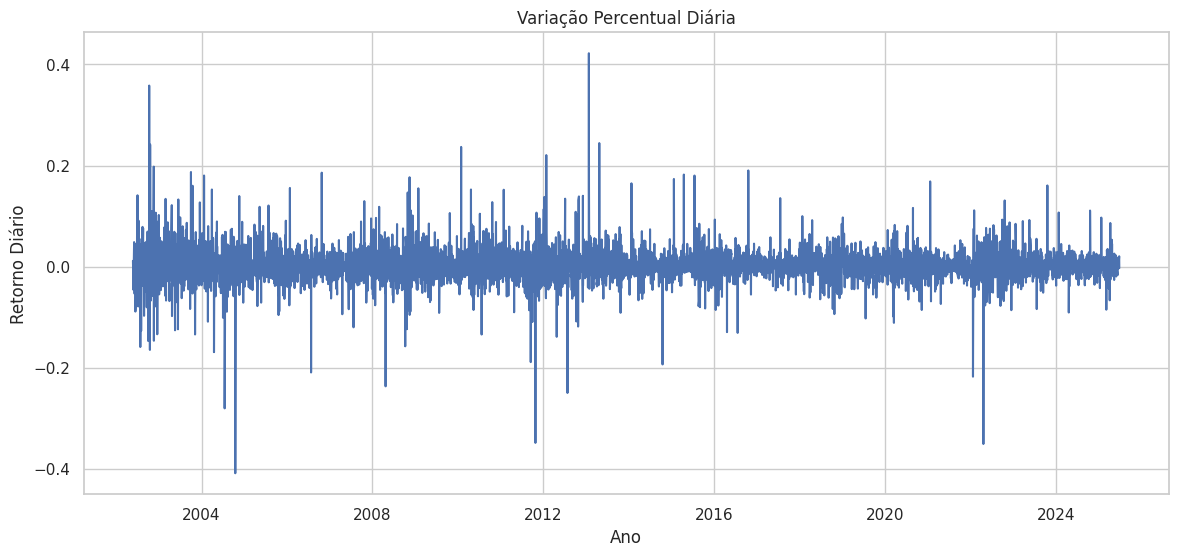

In [12]:
# Variação percentual diária
df['Return'] = df['Close'].pct_change()
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Return'])
plt.title('Variação Percentual Diária')
plt.xlabel('Ano')
plt.ylabel('Retorno Diário')
plt.show()

### Comentário:
O mapa de calor permite verificar a correlação entre variáveis. Aqui, buscamos entender se variações no volume estão associadas a mudanças no preço de fechamento.

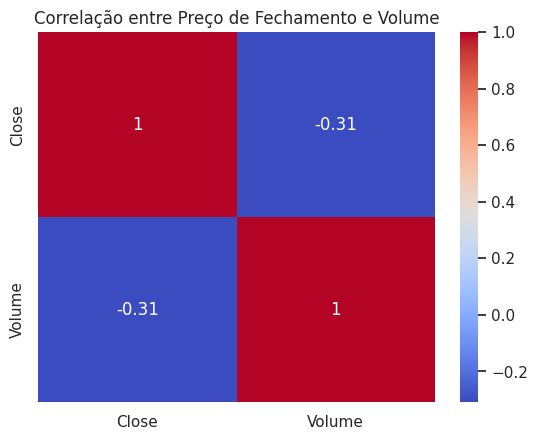

In [13]:
# Correlação entre preços e volume
correlation = df[['Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlação entre Preço de Fechamento e Volume')
plt.show()

### Interpretação dos Atributos Numéricos
- O **preço de fechamento médio** da ação da Netflix ao longo do tempo foi de aproximadamente **$174,28**, com **mediana de $47,33**, indicando forte assimetria positiva: os valores mais recentes elevaram a média.
- A **moda** indica o valor mais comum nos primeiros anos da série, com preços na faixa de $1,60.
- O **desvio padrão** elevado (~238) mostra que os preços variaram consideravelmente, possivelmente refletindo o crescimento da empresa ao longo do tempo.
- O **volume negociado** não foi incluído na tabela acima, mas será analisado separadamente por sua natureza distinta.

In [14]:
# Identificar possíveis outliers usando Z-Score
from scipy.stats import zscore
z_scores = np.abs(zscore(df[['Close', 'Volume']]))
outliers = (z_scores > 3).sum()
print('Possíveis outliers detectados (Z > 3):')
print(outliers)

Possíveis outliers detectados (Z > 3):
242


**Nota:** A presença de outliers é esperada em séries financeiras, especialmente em empresas de alto crescimento como a Netflix. Esses pontos extremos representam momentos de alta valorização ou negociação intensa (ex: pandemia, lançamentos estratégicos, resultados trimestrais).

### Comentário:
A normalização padroniza os dados para a mesma escala, útil especialmente em comparações visuais. Este gráfico mostra como a curva do preço de fechamento se comporta após essa transformação.

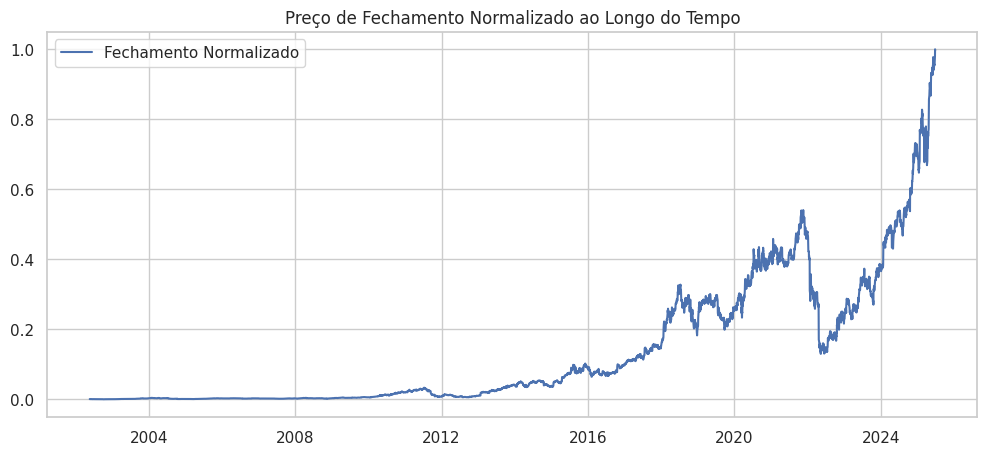

In [15]:
# Visualizar dados normalizados novamente após análise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df_norm[['Open', 'High', 'Low', 'Close']])
plt.figure(figsize=(12,5))
plt.plot(df_norm['Date'], df_norm['Close'], label='Fechamento Normalizado')
plt.title('Preço de Fechamento Normalizado ao Longo do Tempo')
plt.legend()
plt.show()

## 5. Conclusões e Considerações Finais
- A análise demonstrou crescimento expressivo do valor de mercado da Netflix ao longo dos anos.
- O comportamento do volume negociado sugere forte influência de eventos de mercado.
- A variação percentual diária é volátil, o que é comum em empresas de tecnologia.
- A média móvel auxilia na suavização da série temporal e na identificação de tendências.
- As boas práticas de análise foram seguidas, com tratamento de dados, visualização e explicações claras.

## 6. Boas Práticas Aplicadas
- Comentários explicativos no código
- Organização clara e lógica da análise
- Visualizações relevantes
- Normalização dos dados
- Justificativas para cada etapa realizada

## 7. Referências
- Kaggle: https://www.kaggle.com/
- Documentações oficiais das bibliotecas utilizadas (Pandas, Matplotlib, Seaborn, Scikit-learn)